# Exploring fish data

Use EKS on fish videos from section 5.9.6. 

## Setting up.

In [1]:
import os
import pandas as pd
import sys
from eks.utils import convert_lp_dlc
from eks.multiview_pca_smoother import ensemble_kalman_smoother_multi_cam
from eks.newton_eks import *
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm.notebook as tqdm
from scipy.optimize import *


### Fish predictions
Run eks and match outputs

In [77]:
#%run -i 'test_script.py'

Match video 1058.

In [20]:
baseline = pd.read_csv("/Users/clairehe/Documents/GitHub/eks/data/misc/mirror-fish_ensemble-predictions/eks/20210126_Sean/img001058.csv", header=[ 1, 2],index_col=0)
new = pd.read_csv("/Users/clairehe/Documents/GitHub/eks/data/misc/one-video-mirror-fish-predictions/eks_outputs/20210126_Sean/img001058.csv", header=[ 1, 2], index_col=0)

In [21]:
baseline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Columns: 135 entries, ('head_main', 'x') to ('caudal_v_right', 'likelihood')
dtypes: float64(135)
memory usage: 54.2 KB


In [85]:
baseline0.columns[::3][0][1]

'head_main'

In [78]:
baseline0 = pd.read_csv("/Users/clairehe/Documents/GitHub/eks/data/misc/mirror-fish_ensemble-predictions/eks/20210126_Sean/img001058.csv", header=[0, 1, 2],index_col=0)


In [84]:
keypoint_names = [l[1] for l in baseline0.columns[::3]]
markers_tmp = convert_lp_dlc(baseline0, keypoint_names, model_name=tracker_name)
markers_tmp.head()

,head_main_x,head_main_y,head_main_likelihood,chin_base_main_x,chin_base_main_y,chin_base_main_likelihood,chin1_4_main_x,chin1_4_main_y,chin1_4_main_likelihood,chin_half_main_x,...,dorsal_right_likelihood,anal_right_x,anal_right_y,anal_right_likelihood,caudal_d_right_x,caudal_d_right_y,caudal_d_right_likelihood,caudal_v_right_x,caudal_v_right_y,caudal_v_right_likelihood
0,284.484465,327.604150,1.0,290.952054,355.944485,1.0,290.120168,360.827529,1.0,288.758240,...,1.0,428.625227,294.041840,1.0,449.786866,226.672516,1.0,456.967427,250.862256,1.0
1,284.504398,327.655094,1.0,290.957473,355.982915,1.0,290.131126,360.849305,1.0,288.758226,...,1.0,428.586771,294.094250,1.0,449.681806,226.674966,1.0,456.858999,250.829945,1.0
2,284.561047,327.796011,1.0,290.964310,356.114071,1.0,290.143333,360.921840,1.0,288.752028,...,1.0,428.583316,294.270777,1.0,449.318618,226.664613,1.0,456.603781,250.795092,1.0
3,284.694178,328.119879,1.0,290.959048,356.508793,1.0,290.124215,361.134914,1.0,288.689506,...,1.0,429.169437,295.132569,1.0,448.213353,226.595814,1.0,456.116096,250.831631,1.0
4,284.849493,328.490232,1.0,290.958627,356.887973,1.0,290.089904,361.389809,1.0,288.558549,...,1.0,429.523763,295.636518,1.0,446.992500,226.608319,1.0,455.351106,251.095426,1.0


Text(0.5, 0.98, 'Video 1058')

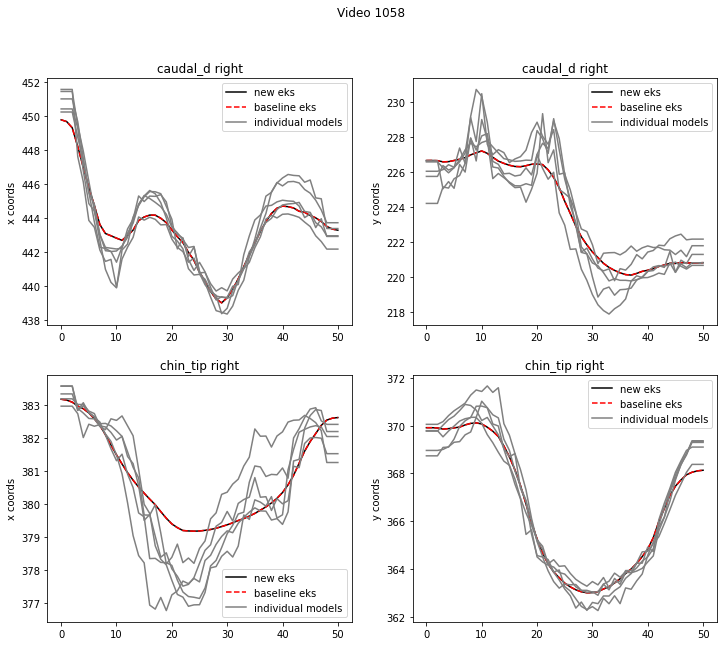

In [86]:
pathfile = "/Users/clairehe/Documents/GitHub/eks/data/misc/mirror-fish_ensemble-predictions/"

fig,ax = plt.subplots(2,2,figsize=(12,10))

ax[0,0].plot(new.caudal_d_right[["x"]], color='black')
ax[0,0].plot(baseline.caudal_d_right[["x"]], 'r--',label='baseline' )
ax[0,0].plot(pd.read_csv(pathfile+"network_0"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["x"]], color='gray')
ax[0,0].plot(pd.read_csv(pathfile+"network_1"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["x"]], color='gray')
ax[0,0].plot(pd.read_csv(pathfile+"network_2"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["x"]], color='gray')
ax[0,0].plot(pd.read_csv(pathfile+"network_3"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["x"]], color='gray')
ax[0,0].plot(pd.read_csv(pathfile+"network_4"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["x"]], color='gray')
ax[0,0].set_ylabel("x coords")
ax[0,0].set_title("caudal_d right")
ax[0,0].legend(['new eks','baseline eks', 'individual models'])

ax[0,1].plot(new.caudal_d_right[["y"]], color='black')
ax[0,1].plot(baseline.caudal_d_right[["y"]], 'r--',label='baseline')
ax[0,1].plot(pd.read_csv(pathfile+"network_0"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["y"]], color='gray')
ax[0,1].plot(pd.read_csv(pathfile+"network_1"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["y"]], color='gray')
ax[0,1].plot(pd.read_csv(pathfile+"network_2"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["y"]], color='gray')
ax[0,1].plot(pd.read_csv(pathfile+"network_3"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["y"]], color='gray')
ax[0,1].plot(pd.read_csv(pathfile+"network_4"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["y"]], color='gray')
ax[0,1].set_title("caudal_d right")
ax[0,1].set_ylabel("y coords")
ax[0,1].legend(['new eks','baseline eks', 'individual models'])

ax[1,0].plot(new.chin_tip_right[["x"]], color='black')
ax[1,0].plot(baseline.chin_tip_right[["x"]], 'r--',label='baseline')
ax[1,0].plot(pd.read_csv(pathfile+"network_0"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["x"]], color='gray')
ax[1,0].plot(pd.read_csv(pathfile+"network_1"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["x"]], color='gray')
ax[1,0].plot(pd.read_csv(pathfile+"network_2"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["x"]], color='gray')
ax[1,0].plot(pd.read_csv(pathfile+"network_3"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["x"]], color='gray')
ax[1,0].plot(pd.read_csv(pathfile+"network_4"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["x"]], color='gray')
ax[1,0].set_title("chin_tip right")
ax[1,0].set_ylabel("x coords")
ax[1,0].legend(['new eks','baseline eks', 'individual models'])

ax[1,1].plot(new.chin_tip_right[["y"]],color='black')
ax[1,1].plot(baseline.chin_tip_right[["y"]], 'r--',label='baseline')
ax[1,1].plot(pd.read_csv(pathfile+"network_0"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["y"]], color='gray')
ax[1,1].plot(pd.read_csv(pathfile+"network_1"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["y"]], color='gray')
ax[1,1].plot(pd.read_csv(pathfile+"network_2"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["y"]], color='gray')
ax[1,1].plot(pd.read_csv(pathfile+"network_3"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["y"]], color='gray')
ax[1,1].plot(pd.read_csv(pathfile+"network_4"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["y"]], color='gray')
ax[1,1].set_title("chin_tip right")
ax[1,1].set_ylabel("y coords")
ax[1,1].legend(['new eks','baseline eks', 'individual models'])

plt.suptitle("Video 1058")

Things are working properly!

### Pupil predictions

In [110]:
pupil1 = "/Users/clairehe/Documents/GitHub/eks/data/ibl-pupil/5285c561-80da-4563-8694-739da92e5dd0.left.rng=0.csv"
df_pupil = pd.read_csv(pupil1, header=[0,1,2], index_col=0)
df_pupil.head()

scorer    heatmap_mhcrnn_tracker                                      \
bodyparts            pupil_top_r                       pupil_right_r   
coords                         x          y likelihood             x   
0                      53.971542  40.784889   0.996096     63.997185   
1                      53.971542  40.784889   0.996096     63.997185   
2                      53.971542  40.784889   0.996096     63.997185   
3                      54.682766  41.602886   0.994934     64.214340   
4                      54.535515  41.143906   0.999473     64.464943   

scorer                                                                \
bodyparts                       pupil_bottom_r                         
coords             y likelihood              x          y likelihood   
0          50.457775   0.998967      54.795803  61.129665   0.995241   
1          50.457775   0.998967      54.795803  61.129665   0.995241   
2          50.457775   0.998967      54.795803  61.129665   0.995241   
3          50.438499   0.996683      55.169212  61.332661   0.999601   
4          50.506241   0.999723      55.322891  60.785454   0.999518   

scorer                                        
bodyparts pupil_left_r                        
coords               x          y likelihood  
0            42.372387  51.355415   0.996667  
1            42.372387  51.355415   0.996667  
2            42.372387  51.355415   0.996667  
3            43.415447  50.964855   0.998236  
4            44.182907  51.238132   0.999794

In [111]:
%run -i 'scripts/pupil_example.py' --csv-dir 'data/ibl-pupil' --save-dir 'data/misc/pupil-test/' --diameter-s 0.99 --com-s 0.99 

Smoothing matrix: [[0.99 0.   0.  ]
 [0.   0.99 0.  ]
 [0.   0.   0.99]]
filtering...
done filtering
smoothing...
done smoothing
saving smoothed predictions to data/misc/pupil-test/kalman_smoothed_pupil_traces.csv
saving latents to data/misc/pupil-test/kalman_smoothed_latents.csv
see example EKS output at data/misc/pupil-test/example_eks_result.pdf


In [112]:
pupil_latent = pd.read_csv("/Users/clairehe/Documents/GitHub/eks/data/misc/pupil-test/kalman_smoothed_latents.csv", header=[0,1], index_col=0)
pupil_latent.head()

scorer ensemble-kalman_tracker                      
latent                diameter      com_x      com_y
0                    19.820629  54.719227  50.747470
1                    19.707099  54.772514  50.759262
2                    19.554894  54.870607  50.772020
3                    19.337871  55.074898  50.760586
4                    19.162826  55.176431  50.757116

In [113]:
pupil_trace = pd.read_csv("/Users/clairehe/Documents/GitHub/eks/data/misc/pupil-test/kalman_smoothed_pupil_traces.csv", header=[0,1,2],index_col=0)
pupil_trace.head()

scorer    ensemble-kalman_tracker                                      \
bodyparts             pupil_top_r                       pupil_right_r   
coords                          x          y likelihood             x   
0                       54.719227  40.837156        NaN     64.629542   
1                       54.772514  40.905712        NaN     64.626064   
2                       54.870607  40.994573        NaN     64.648054   
3                       55.074898  41.091650        NaN     64.743833   
4                       55.176431  41.175703        NaN     64.757844   

scorer                                                                \
bodyparts                       pupil_bottom_r                         
coords             y likelihood              x          y likelihood   
0          50.747470        NaN      54.719227  60.657785        NaN   
1          50.759262        NaN      54.772514  60.612811        NaN   
2          50.772020        NaN      54.870607  60.549467        NaN   
3          50.760586        NaN      55.074898  60.429521        NaN   
4          50.757116        NaN      55.176431  60.338529        NaN   

scorer                                        
bodyparts pupil_left_r                        
coords               x          y likelihood  
0            44.808913  50.747470        NaN  
1            44.918965  50.759262        NaN  
2            45.093160  50.772020        NaN  
3            45.405963  50.760586        NaN  
4            45.595018  50.757116        NaN

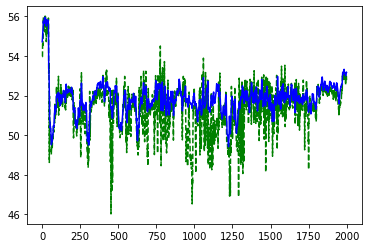

In [145]:
plt.plot(df_pupil['heatmap_mhcrnn_tracker']['pupil_top_r']['x'], 'g--')
plt.plot(pupil_trace['ensemble-kalman_tracker']['pupil_top_r']['x'], 'b')
#plt.plot(pupil_latent['ensemble-kalman_tracker']['com_x'], 'r-.')

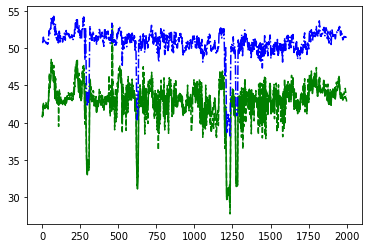

In [114]:
plt.plot(df_pupil['heatmap_mhcrnn_tracker']['pupil_top_r']['y'],'g--')
plt.plot(pupil_trace['ensemble-kalman_tracker']['pupil_top_r']['y'],'g')
plt.plot(pupil_latent['ensemble-kalman_tracker']['com_y'], 'b-.')

In [116]:
keypoint_names = [c[1] for c in df_pupil.columns[::3]]
model_name = df_pupil.columns[0][0]
markers_curr_fmt = convert_lp_dlc(df_pupil, keypoint_names, model_name=model_name)

In [117]:
keypoint_names

['pupil_top_r', 'pupil_right_r', 'pupil_bottom_r', 'pupil_left_r']

In [118]:
markers_curr_fmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pupil_top_r_x              2000 non-null   float64
 1   pupil_top_r_y              2000 non-null   float64
 2   pupil_top_r_likelihood     2000 non-null   float64
 3   pupil_right_r_x            2000 non-null   float64
 4   pupil_right_r_y            2000 non-null   float64
 5   pupil_right_r_likelihood   2000 non-null   float64
 6   pupil_bottom_r_x           2000 non-null   float64
 7   pupil_bottom_r_y           2000 non-null   float64
 8   pupil_bottom_r_likelihood  2000 non-null   float64
 9   pupil_left_r_x             2000 non-null   float64
 10  pupil_left_r_y             2000 non-null   float64
 11  pupil_left_r_likelihood    2000 non-null   float64
dtypes: float64(12)
memory usage: 203.1 KB


In [126]:
state_transition_matrix = np.asarray([
    [0.99, 0, 0],
    [0, 0.99, 0],
    [0, 0, 0.99]
])
markers_list= []
markers_list.append(markers_curr_fmt)
from eks.pupil_smoother import ensemble_kalman_smoother_pupil 

df_dicts = ensemble_kalman_smoother_pupil(
    markers_list=markers_list,
    keypoint_names=keypoint_names,
    tracker_name='ensemble-kalman_tracker',
    state_transition_matrix=state_transition_matrix,
)


filtering...


LinAlgError: Singular matrix

## Optimisation-based EKS

### 5.9.6 Nonlinear observations and constrained dynamics
What if we have access to multiple well-calibrated cameras, as in e.g. (Dunn et al., 2021)? In this setting we can apply a strong constraint: limb lengths are constant, i.e., the 3D distance between body parts $j$ and $k$ should be fixed at some value $L_{jk}$ (Karashchuk et al., 2021; Zhang et al., 2021).

We may also want to handle potential nonlinearities in the mapping from the true three-dimensional coordinates onto the camera plane.

How to incorporate these constraints and nonlinearities into the EKS? We can use the well-known fact that the Kalman smoother can be written as the solution to an optimization problem involving a block-tridiagonal Hessian (Paninski et al., 2010):
$\hat{Q} = \arg \max_Q \log p(Q|O) = \arg \max_Q \log p(Q) + \log p(O|Q)$
with $\log p(Q) = -\frac{1}{2} \sum_{tk} (q_{tk} - q_{t+1,k})^T E_k^{-1} (q_{tk} - q_{t+1,k})$ and $\log p(O|Q) =-\frac{1}{2} \sum_{tkv} (f_{v}(q_{tk}) - O_{tkv})^T D_{tkv}^{-1} (f_v(q_{tk}) - O_{tkv})$

Here t indexes frames, k bodyparts, and v camera views. The first term encodes the (Gaussian) dynamics model as above; the second term encodes the observation model, where the (potentially nonlinear) functions fv map the keypoints into the v-th camera plane.

Finally, we can express the constraints in terms of penalties of the form $\sum_{tjk} - \lambda(||q_{tj}-q_{tk}||_2 - L_{jk})^2$  for an appropriate Lagrange parameter $\lambda$.

Adding all these terms, we arrive at a non-quadratic objective function with a block tridiagonal Hessian; if we use a good initial $Q$ then this objective function should be locally concave, and we can efficiently ascend via the usual block tridiagonal Newton-based iterations (with each Newton step requiring $O(T)$ computation). The output of this approach simultaneously triangulates the observations to obtain the true three-dimensional body part locations, while temporally smoothing and enforcing geometric constraints.

### Ensemble Kalman smoother

observation : $$o_t = B_tq_t + n_t = f_v(q_{tk})+n_t, \ \ n_t \sim N(\mu, D_t)$$ 
latent : $$q_{t} = A_t q_{t-1} + e_{t} = q_{t-1,k}+e_t, \ \ e_{t} \sim N(0, E_t)$$
Then $H = \begin{pmatrix} T_1 & R_{12}^T & \dots & 0 \\
                           R_{12} & T_2 & R_{23}^T & \vdots \\ 
                           0 & R_{23} & \ddots & 0  \\ 
                            \vdots & \ddots &  \ddots & R_{n-1, n}^T \\
                           0 & \dots & R_{n-1,n} & T_n
                           \end{pmatrix}$
                           


$H$ is with $R_{i,i+1} = \frac{\partial^2}{\partial q_i \partial q_{i+1}} \log p(q_{i+1}|q_i) = E_{k}^{-1} A_{k}$, $$T_{i} =  \frac{\partial^2}{\partial q_i^2} \log p(o_i|q_i)+\frac{\partial^2}{\partial q_i^2} \log p(q_{i+1}|q_{i}) = - (E^{-1} + A^T E^{-1} A + B^T D^{-1} B)$$

Newton with iteration $q^{i+1} = q^i - H^{-1} \nabla$.

Dimensions: $o_t \in \mathbb{R}^{2K}$, $q_t \in \mathbb{R}^r$, $B \in  \mathbb{R}^{2K \times r}$ and $A_t \in \mathbb{R}^{r\times r}$, $E_t \in \mathbb{R}^{r\times r}$, $D_t \in \mathbb{R}^{2K \times 2K}$

In [153]:

scaled_ensemble_preds = ensemble_preds.copy()
scaled_ensemble_stacks = ensemble_stacks.copy()
# subtract COM means from the ensemble predictions
for i in range(ensemble_preds.shape[1]):
    if i % 2 == 0:
        scaled_ensemble_preds[:, i] -= mean_x_obs
    else:
        scaled_ensemble_preds[:, i] -= mean_y_obs
# subtract COM means from all the predictions
for i in range(ensemble_preds.shape[1]):
    if i % 2 == 0:
        scaled_ensemble_stacks[:, :, i] -= mean_x_obs
    else:
        scaled_ensemble_stacks[:, :, i] -= mean_y_obs
y = scaled_ensemble_preds


We use the values for the kalman filter to test with the pupil data. Assume $f_v$ is linear with $f_v(q_t) = B_t q_t$. Latent space dimension is 3, observation is 8.

In [154]:
from eks.utils import make_dlc_pandas_index
from eks.ensemble_kalman import ensemble
from eks.pupil_utils import get_pupil_location, get_pupil_diameter

# compute ensemble median
keys = ['pupil_top_r_x', 'pupil_top_r_y', 'pupil_bottom_r_x', 'pupil_bottom_r_y',
        'pupil_right_r_x', 'pupil_right_r_y', 'pupil_left_r_x', 'pupil_left_r_y']
ensemble_preds, ensemble_vars, ensemble_stacks, keypoints_mean_dict, keypoints_var_dict, keypoints_stack_dict = ensemble(
    markers_list, keys)

# ## Set parameters
# compute center of mass
pupil_locations = get_pupil_location(keypoints_mean_dict)
pupil_diameters = get_pupil_diameter(keypoints_mean_dict)
diameters = []
for i in range(len(markers_list)):
    keypoints_dict = keypoints_stack_dict[i]
    diameter = get_pupil_diameter(keypoints_dict)
    diameters.append(diameter)

mean_x_obs = np.mean(pupil_locations[:, 0])
mean_y_obs = np.mean(pupil_locations[:, 1])
# make the mean zero
x_t_obs, y_t_obs = pupil_locations[:, 0] - mean_x_obs, pupil_locations[:, 1] - mean_y_obs

q = np.vstack((pupil_diameters, x_t_obs, y_t_obs))


In [156]:
y.shape

(2000, 8)

In [161]:
E.shape

(3, 3)

In [189]:
# Initial states
r = 3
T=2000
mu0 = np.asarray([np.mean(pupil_diameters), 0.0, 0.0])

# diagonal: var
S0 = np.asarray([
    [np.var(pupil_diameters), 0.0, 0.0],
    [0.0, np.var(x_t_obs), 0.0],
    [0.0, 0.0, np.var(y_t_obs)]
])

A = np.asarray([
    [0.99, 0, 0],
    [0, 0.99, 0],
    [0, 0, 0.99]
])
B = np.asarray([[0, 1, 0], [-.5, 0, 1], [0, 1, 0], 
                [.5, 0, 1], [.5, 1, 0], [0, 0, 1], 
                [-.5, 1, 0],[0, 0, 1]])

# state covariance matrix
E = np.asarray([
        [np.var(pupil_diameters) * (1 - (A[0, 0] ** 2)), 0, 0],
        [0, np.var(x_t_obs) * (1 - A[1, 1] ** 2), 0],
        [0, 0, np.var(y_t_obs) * (1 - (A[2, 2] ** 2))]
    ])

D = np.eye(8)

In [212]:
def gradient(y, mu0, S0, q, A, B, invE, invD, f = None, df = None, df2 = None):
    """ Calculates hessian for log p(Q|Y)
    Linear is assumed as default, if non linear observation map, use f, df, df2
    
    Args:
        y: np.ndarray
            shape (n_samples, n_keypoints)
        mu0: np.ndarray
            shape (n_latents)
        A: np.ndarray
            shape (n_latents, n_latents)
        B: np.ndarray
            shape (n_keypoints, n_latents)
        invD: np.ndarray
            shape (n_keypoints, n_keypoints)
        invE: np.ndarray
            shape (n_latents, n_latents)
        f: np.ndarray
            shape (n_samples, n_keypoints)
        df: np.ndarray
            shape (n_samples, n_keypoints)
        df2: np.ndarray
            shape (n_samples, n_keypoints)
     """ 
    T = y.shape[0]
    r = mu0.shape[0]
    G = np.zeros(shape=(T, r))

    for i in range(1,T-1):
        if f == None:
            # linear map
            G[i,:] = - invE @(q[:,i] - A@q[:,i-1])+ A.T @ invE @(q[:,i+1]-A@q[:,i]) + B.T @ invD @ (y[i,:] - B @ q[:,i])
            #print(G[i,:])
        else :
            G[i,:] = - invE @(q[:,i] - A@q[:,i-1])+ A.T @ invE @(q[:,i+1]-A@q[:,i]) + df.T @ invD @ (f[:,i]-q[:,i])
    # Boundary condition
    G[0, :] = A.T @ invE @ (q[:,1]-A@q[:,0])
    G[T-1,:] =  - invE @(q[:,T-1] - A@q[:,T-2])+ A.T @ invE @(-A@q[:,T-1]) + B.T @ invD @ (y[T-1,:] - B @ q[:,T-1])
    
    return G

G = gradient(y, mu0, S0, A, B, invE, invD, f = None, df = None, df2 = None)

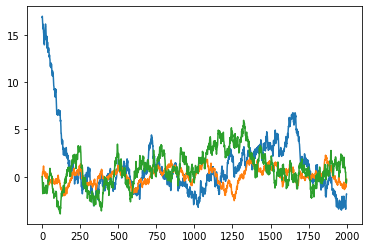

In [199]:
np.random.seed(123)
q = np.zeros((r,T))
q[:,0] = mu0
for i in range(1,T):
    q[:,i] = np.random.multivariate_normal(A@q[:,i-1], E,1)
    
for i in range(3):
    plt.plot(q[i,:])

Use pupil data for test

In [183]:
T = y.shape[0]
invE = np.linalg.inv(E)
invD = np.linalg.inv(D)

Full matrix of size T by T


<AxesSubplot:>

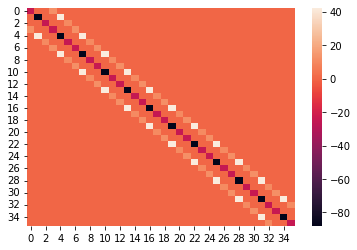

In [185]:
G = gradient(y, mu0, S0, A, B, invE, invD)
H = hessian(y, q, A, B, invD, invE)
sns.heatmap(H[:36,:36])

<AxesSubplot:>

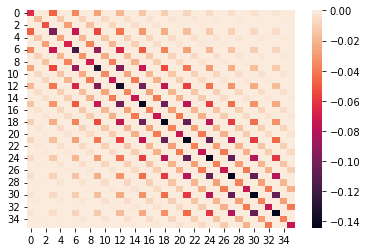

In [105]:
sns.heatmap(np.linalg.inv(H)[:36,:36])

In [209]:
def newton_linear(y,mu0, S0, q, A, B, invE, invD, max_iter=1000, eps = 0.01):
    H_1 = np.linalg.inv(hessian(y, mu0, A, B, invD, invE))
    old = q.T
    loss = [obj_loglikelihood(y, old.T, invE, invD, A, B)]
    
    for it in tqdm.tqdm(range(max_iter)):
        G = gradient(y, mu0, S0, old.T, A, B, invE, invD)

        new = old - H_1@ G
        obj = obj_loglikelihood(y,new.T,invE,invD, A, B)
        loss.append(obj)
        if np.linalg.norm(new - old) < eps:
            print("Local maximum reached before maximum iterations reached")
            break
            return old 
        else:
            old = new
            
    return new,loss


In [200]:
from eks.newton_eks import newton_linear
sol,loss = newton_linear(y,mu0,S0,q,A,B,invE,invD, max_iter = 5000)


Full matrix of size T by T


  0%|          | 0/5000 [00:00<?, ?it/s]

/Users/clairehe/Documents/GitHub/eks/eks/newton_eks.py:141: RuntimeWarning: overflow encountered in matmul
  diffo = np.sum(y.T - B@q, axis=1)
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/clairehe/Documents/GitHub/eks/eks/newton_eks.py:141: RuntimeWarning: invalid value encountered in matmul
  diffo = np.sum(y.T - B@q, axis=1)
/Users/clairehe/Documents/GitHub/eks/eks/newton_eks.py:100: RuntimeWarning: overflow encountered in add
  
/Users/clairehe/Documents/GitHub/eks/eks/newton_eks.py:155: RuntimeWarning: invalid value encountered in matmul
  loss = [obj_loglikelihood(y, old.T, invE, invD, A, B)]
/Users/clairehe/Documents/GitHub/eks/eks/newton_eks.py:135: RuntimeWarning: invalid value encountered in matmul
  shape (n_latents, n_latents)
/Users/clairehe/Documents/GitHub/eks/eks/newton_eks.py:136: RuntimeWarning: invalid value encountere

In [202]:
sol

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       ...,
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

ValueError: x and y must have same first dimension, but have shapes (1000,) and (2000,)

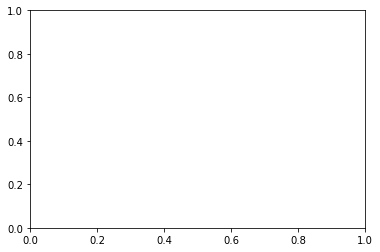

In [208]:
plt.plot([i for i in range(1000)],loss[:2000])

In [ ]:
for i in range(3):
    plt.plot(q[i,:], '-.', color='gray')
    #plt.plot(sol[:,i], '.', color='blue')

In [ ]:
H_1 = np.linalg.inv(H)
sol = newton_raphson(q0, max_iterations=1000, threshold=1e-6)

In [109]:
def schur_bmi(A, B, C, D):
    """
    Invert matrix using Schur complement
    P = (A B
         C D) 
         
    A : np.ndarray
        shape (k, k)
    B : np.ndarray
        shape (l, k)
    C : np.ndarray
        shape (k, l)
    D : np.ndarray
        shape (l, l)
    """
    

SyntaxError: unexpected EOF while parsing (2193457717.py, line 4)

In [ ]:
def blocktridiag():
    """ Implements search direction solve in O(d^3*N) via block tridiagonal Thomas algorithm
    Args:
        y: np.ndarray
            shape (samples, n_keypoints)
        Cq: np.ndarry
            shape (n_latents, n_latents)
        A: np.ndarray
            shape (n_latents, n_latents)
        B: np.ndarray
            shape (n_keypoints, n_latents)
        Cy: np.ndarray
            shape (n_keypoints, n_keypoints)
    """      
    # Forward sweep
    Cpr = B
    
    np.block[[Apr,Bpr],[Cpr,Dpr]]
    